# Panda and EDA Practice
### James Christensen
### Created September 5, 2025

This project uses the student performance dataset from the UCI database. It is cited right here.

*Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.*

Import libraries

In [1]:
import numpy as np
import pandas as pd

Create dataframe

In [6]:
df_performance_full = pd.read_csv('student-mat.csv', sep = ';')
df_performance_full.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The full dataset has numerous features. While all of them are interesting in their own right, to make matters easier, I will select a few to experiment with. I'm going to reduce this initial dataset down to the final grade (target), sex, age, and absences.

In [9]:
df_reduced = df_performance_full[['sex', 'age', 'absences', 'G3']]
df_reduced.head()

,sex,age,absences,G3
0,F,18,6,6
1,F,17,4,6
2,F,15,10,10
3,F,15,2,15
4,F,16,4,10


This data appears to be already cleaned. As such, I will continue with EDA for now. I intend to come back and select some different columns that need to be cleaned later.

### Exploratory Data Analysis

First, it seems helpful to create some summary statistics for the target column as well as the absences column

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
df_reduced[['absences', 'G3']].describe()

,absences,G3
count,395.000000,395.000000
mean,5.708861,10.415190
std,8.003096,4.581443
min,0.000000,0.000000
25%,0.000000,8.000000
50%,4.000000,11.000000
75%,8.000000,14.000000
max,75.000000,20.000000


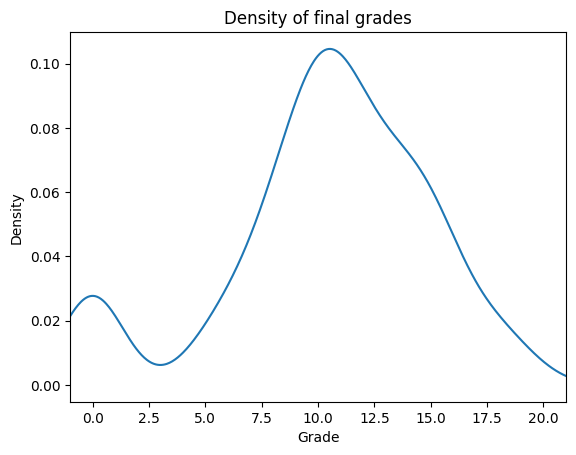

In [ ]:
df_reduced['G3'].plot(kind = "density")
plt.xlim(-1,21)
plt.xlabel("Grade Score")
plt.title("Density of final grades")
plt.show()

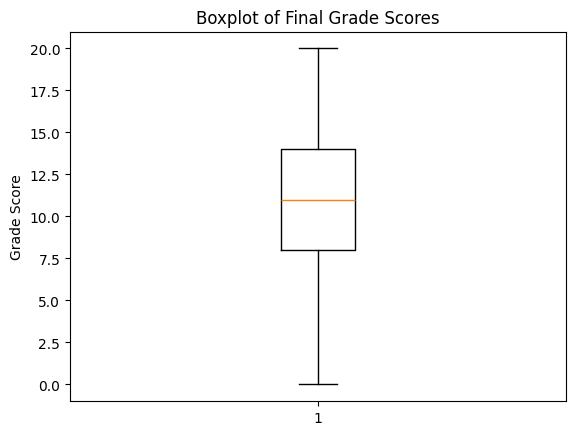

In [23]:
plt.boxplot(df_reduced['G3'])
plt.ylabel("Grade Score")
plt.title("Boxplot of Final Grade Scores")
plt.show()

These graphs paint a fairly clear picture of how the final grades are distributed. It appears that the grades are distributed normally centered around 10.5, with some abnormal weight on the left. While this would suggest that the data is skewed right, I'll perform some t-tests to determine whether these were students that just didnt bother to show up to class.

In [24]:
from scipy import stats

We will perform a two sample t-test. This test requires that the samples are independent. Since one sample is individuals who received a final grade of '0' and the other is everybody else, this assumption of indepence is upheld.

In [ ]:
#TODO Verify that the correct values are being used
t_statistic, p_value = stats.ttest_ind(df_reduced.loc[df_reduced['G3'] == 0, 'absences'],
                                       df_reduced.loc[df_reduced['G3'] != 0, 'absences'],
                                       equal_var = False)
print(f"The t-statistic from this test is {t_statistic}. With a p-value of {p_value}")

The t-statistic from this test is -14.576545156320009. With a p-value of 4.5392776951721454e-38


At this p-value, it is appropriate to reject the null hypothesis, which is students with grades of 0 have the same number of absences as students with a non-zero grade. To take a closer look, here are some overlayed histograms of the two groups.

In [ ]:
temp_df.loc[df_reduced['DNF_Grade'], 'absences'] #TODO verify that what is below is working correctly

128    0
130    0
131    0
134    0
135    0
136    0
137    0
140    0
144    0
146    0
148    0
150    0
153    0
160    0
162    0
168    0
170    0
173    0
221    0
239    0
242    0
244    0
259    0
264    0
269    0
296    0
310    0
316    0
332    0
333    0
334    0
337    0
341    0
343    0
367    0
383    0
387    0
389    0
Name: absences, dtype: int64

C:\Users\legoe\AppData\Local\Temp\ipykernel_65412\1307005710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['DNF_Grade'] = df_reduced['G3'] == 0
C:\Users\legoe\AppData\Local\Temp\ipykernel_65412\1307005710.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sn.kdeplot(temp_df, x = 'absences', hue = 'DNF_Grade', common_norm = False)


<Axes: xlabel='absences', ylabel='Density'>

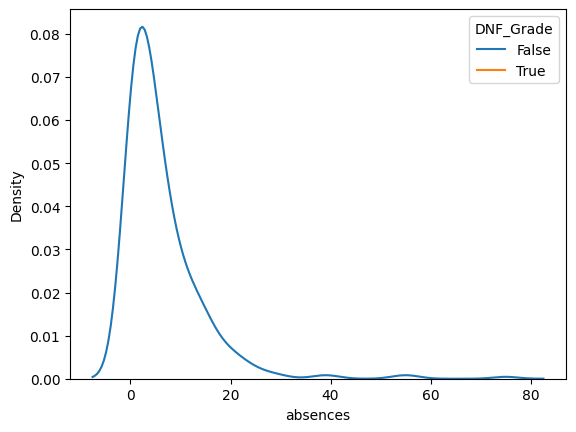

In [32]:
temp_df = df_reduced
temp_df['DNF_Grade'] = df_reduced['G3'] == 0

sn.kdeplot(temp_df, x = 'absences', hue = 'DNF_Grade', common_norm = False)